# Multiclass Classification

# Loading the Reuters dataset

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

# Decoding newswires back to text

In [ ]:
word_index =reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
train_labels[10]

3

# Encoding the data

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
!pip install keras.utils

In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Model Definition

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation= "relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model

In [ ]:
history = model.fit(partial_x_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data = (x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.3230 - loss: 3.1860 - val_accuracy: 0.5900 - val_loss: 1.9024
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6288 - loss: 1.7128 - val_accuracy: 0.6700 - val_loss: 1.4226
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7243 - loss: 1.2478 - val_accuracy: 0.7370 - val_loss: 1.2343
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.7876 - loss: 0.9914 - val_accuracy: 0.7630 - val_loss: 1.0925
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8189 - loss: 0.8262 - val_accuracy: 0.7790 - val_loss: 1.0169
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8487 - loss: 0.6806 - val_accuracy: 0.7970 - val_loss: 0.9528
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8793 - loss: 0.5756 - val_accuracy: 0.7920 - val_loss: 0.9452
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8994 - loss: 0.4955 - val_accuracy: 0.8150 

# Plotting the training and validation loss

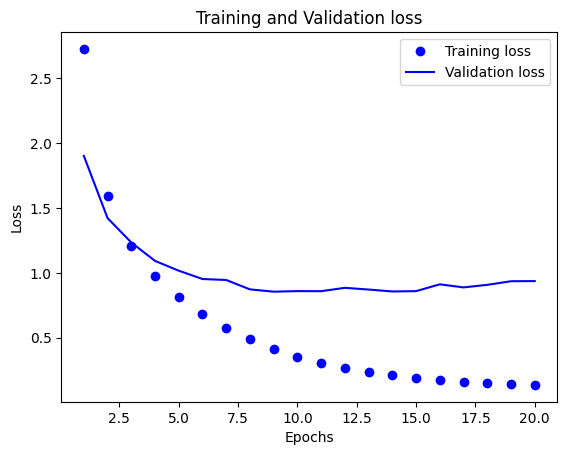

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs , val_loss,"b", label = "Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

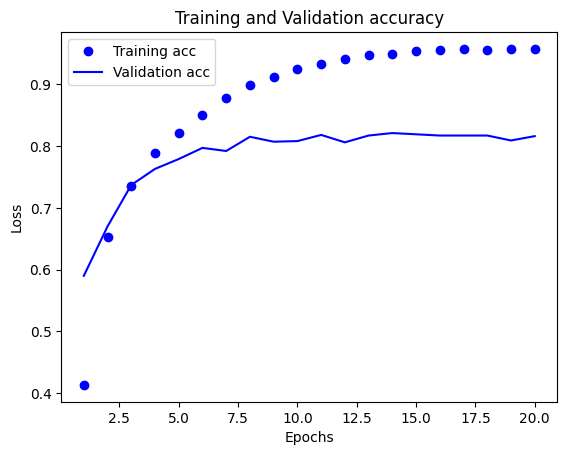

In [ ]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Retraining a model from scratch

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3567 - loss: 3.1955 - val_accuracy: 0.6280 - val_loss: 1.8323
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.6695 - loss: 1.6374 - val_accuracy: 0.7000 - val_loss: 1.3696
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7461 - loss: 1.1963 - val_accuracy: 0.7260 - val_loss: 1.1952
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7869 - loss: 0.9995 - val_accuracy: 0.7630 - val_loss: 1.0878
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8251 - loss: 0.8212 - val_accuracy: 0.7740 - val_loss: 1.0239
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8494 - loss: 0.6895 - val_accuracy: 0.7940 - val_loss: 0.9614
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8782 - loss: 0.5765 - val_accuracy: 0.8020 - val_loss: 0.9339
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9050 - loss: 0.4756 - val_accuracy: 0.8050 - val_los

In [ ]:
results

[0.9788704514503479, 0.7756010890007019]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.18967052537845058

# Generating predictions for new data

In [ ]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

# A different  way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["acc"])

# A model with an information bottleneck

In [ ]:
model = models.Sequential()

model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(4, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 20,
          batch_size = 128,
          validation_data = (x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.0876 - loss: 3.5927 - val_accuracy: 0.4160 - val_loss: 2.5684
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5411 - loss: 2.2025 - val_accuracy: 0.6310 - val_loss: 1.6276
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6439 - loss: 1.5062 - val_accuracy: 0.6380 - val_loss: 1.4727
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6556 - loss: 1.3220 - val_accuracy: 0.6390 - val_loss: 1.3932
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6662 - loss: 1.1747 - val_accuracy: 0.6460 - val_loss: 1.3407
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6961 - loss: 1.0648 - val_accuracy: 0.6680 - val_loss: 1.2855
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7247 - loss: 0.9561 - val_accuracy: 0.6830 - val_loss: 1.2737
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7557 - loss: 0.8769 - val_accuracy: 0.6950 - v